In [1]:
from matplotlib import pyplot as plt, __version__ as matplotlib_version
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

import project_functions as pf

print(matplotlib_version)
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(msno.__version__)

3.5.0
1.21.2
1.3.5
0.11.2
0.5.0


In [2]:
data_path = 'G:/OpenClassrooms/projet_2/p2-arbres-fr.csv'
data = pd.read_csv(data_path, sep=';')

In [3]:
# for bigger plots
scale_factor = 1.5

default_size = [6.4, 4.8]
plt.rcParams['figure.figsize'] = [n * scale_factor for n in default_size]

# Apercu du jeu de données

In [4]:
data.shape

(200137, 18)

In [5]:
data.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


#### Visualisation des données manquantes:

In [6]:
data.isna().sum()

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

<AxesSubplot:>

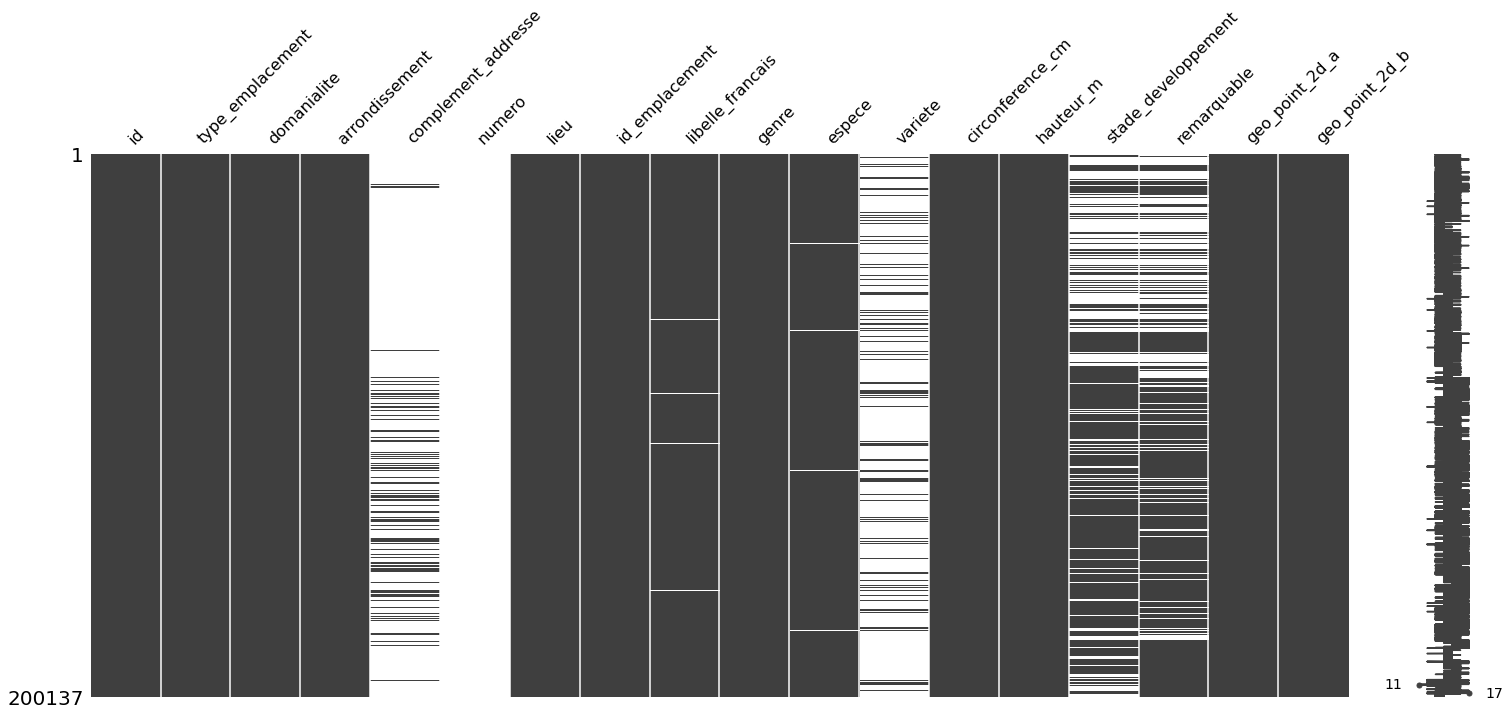

In [7]:
msno.matrix(data)

#### Nombre de lignes en doublon:

In [8]:
print(data.duplicated().sum())
print(data['id'].duplicated().sum())
print(data.drop(['id'], axis=1).duplicated().sum())

0
0
0


#### Statistiques sur les données:

In [9]:
data.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


In [10]:
data[['hauteur_m', 'circonference_cm']].describe()

,hauteur_m,circonference_cm
count,200137.000000,200137.000000
mean,13.110509,83.380479
std,1971.217387,673.190213
min,0.000000,0.000000
25%,5.000000,30.000000
50%,8.000000,70.000000
75%,12.000000,115.000000
max,881818.000000,250255.000000


#### Colonnes avec peu de valeurs uniques:

In [11]:
for index in ['type_emplacement', 'domanialite', 'arrondissement', 'numero', 'stade_developpement', 'remarquable']:
    print(index.upper(), ':\n')
    print(data[index].unique())
    print('\n')

TYPE_EMPLACEMENT :

['Arbre']


DOMANIALITE :

['Jardin' 'Alignement' 'DJS' 'DFPE' 'CIMETIERE' 'DASCO' 'DAC'
 'PERIPHERIQUE' 'DASES' nan]


ARRONDISSEMENT :

['PARIS 7E ARRDT' 'PARIS 17E ARRDT' 'PARIS 16E ARRDT' 'PARIS 4E ARRDT'
 'PARIS 13E ARRDT' 'PARIS 12E ARRDT' 'PARIS 19E ARRDT' 'PARIS 14E ARRDT'
 'PARIS 15E ARRDT' 'PARIS 3E ARRDT' 'PARIS 20E ARRDT' 'PARIS 18E ARRDT'
 'PARIS 6E ARRDT' 'PARIS 11E ARRDT' 'PARIS 1ER ARRDT' 'PARIS 2E ARRDT'
 'PARIS 5E ARRDT' 'VAL-DE-MARNE' 'SEINE-SAINT-DENIS' 'HAUTS-DE-SEINE'
 'PARIS 9E ARRDT' 'PARIS 10E ARRDT' 'PARIS 8E ARRDT' 'BOIS DE BOULOGNE'
 'BOIS DE VINCENNES']


NUMERO :

[nan]


STADE_DEVELOPPEMENT :

[nan 'A' 'J' 'M' 'JA']


REMARQUABLE :

[ 0. nan  1.]




#### Colonnes de valeurs nominales:

In [12]:
nominal_columns = ['id', 
                   'type_emplacement', 
                   'domanialite', 
                   'arrondissement', 
                   'complement_addresse', 
                   'numero', 
                   'lieu', 
                   'id_emplacement', 
                   'libelle_francais', 
                   'genre', 
                   'espece', 
                   'variete', 
                   'remarquable']

#### Visualisation de quelques-unes de ces colonnes:

--------------------
arrondissement
-------------------- 

unique values : 25
duplicates :    200112

nb of index 'PARIS 2E ARRDT': 548


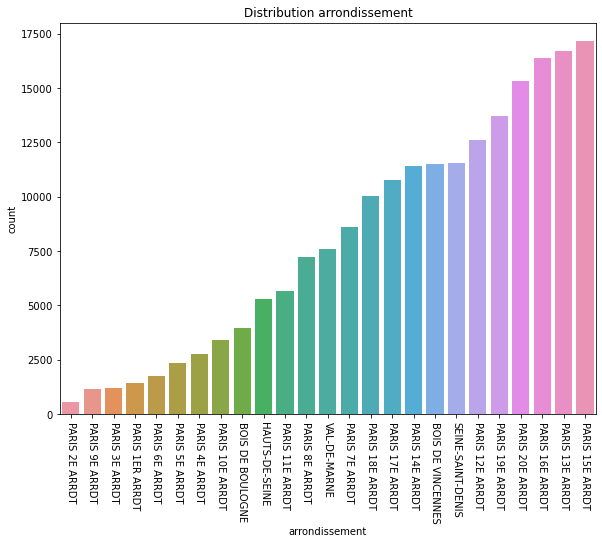

In [13]:
pf.plot_nominal_column('arrondissement', data)

--------------------
domanialite
-------------------- 

unique values : 10
duplicates :    200127

nb of index 'NaN': 1


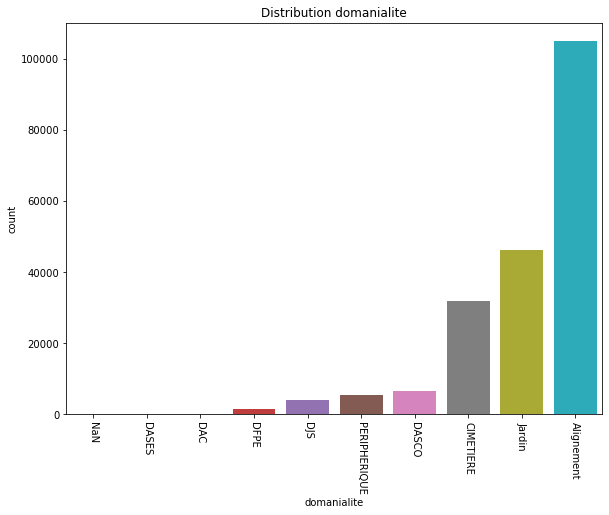

In [14]:
pf.plot_nominal_column('domanialite', data)

--------------------
genre
-------------------- 

unique values : 176
duplicates :    199961

nb of index 'Acer': 18471


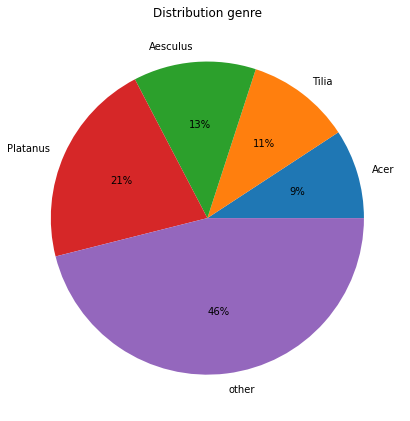

In [15]:
pf.plot_nominal_column('genre', data, percentage_limit=6, plot_type='pie')

--------------------
libelle_francais
-------------------- 

unique values : 193
duplicates :    199944

nb of index 'Erable': 18389


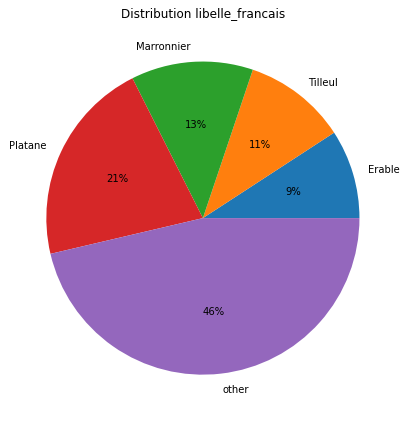

In [16]:
pf.plot_nominal_column('libelle_francais', data, percentage_limit=6, plot_type='pie')

--------------------
remarquable
-------------------- 

unique values : 3
duplicates :    200134

nb of index '1.0': 184


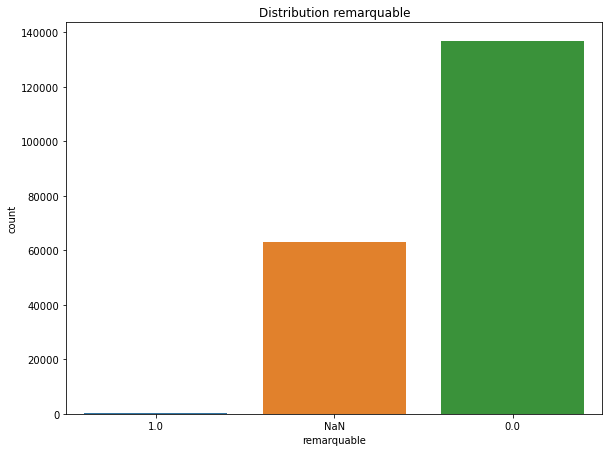

In [17]:
pf.plot_nominal_column('remarquable', data, too_much_indices=False)

#### Colonne de valeurs ordinales:

In [18]:
ordinal_columns = ['stade_developpement']

--------------------
stade_developpement
-------------------- 

unique values : 5
duplicates :    200132

nb of index 'J'= 26937


{'NaN': 67205, 'A': 64438, 'J': 26937, 'M': 6113, 'JA': 35444}

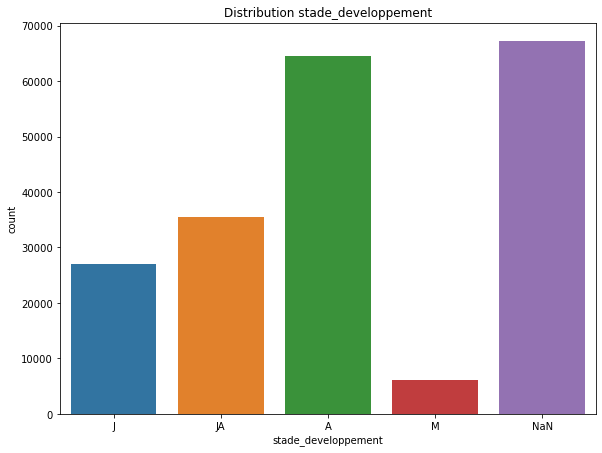

In [19]:
pf.plot_ordinal_column('stade_developpement', ['J', 'JA', 'A', 'M'], data)

--------------------
stade_developpement
-------------------- 

unique values : 4
duplicates :    132928

nb of index 'J'= 26937


{'A': 64438, 'J': 26937, 'M': 6113, 'JA': 35444}

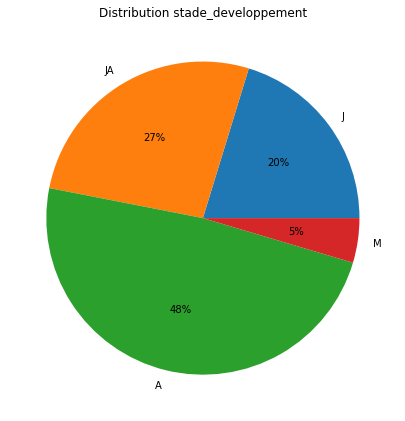

In [20]:
pf.plot_ordinal_column('stade_developpement', 
                       ['J', 'JA', 'A', 'M'], 
                       data, 
                       include_na=False, 
                       plot_type='pie')

# Analyse des données

In [21]:
quantitative_columns = ['geo_point_2d_a', 
                        'geo_point_2d_b', 
                        'hauteur_m', 
                        'circonference_cm']

### Nettoyage des colonnes 'hauteur_m' et 'circonference_cm'

Pour chaque colonne, une valeur limite a été choisie. <br>
Elle permet de déterminer les valeurs aberrantes de cette colonne.<br>
Ces limites ont été choisies après des recherches sur les arbres remarquables de Paris.

In [22]:
columns = {'hauteur_m': 40, 'circonference_cm': 800}

#### Méthodologie globale du nettoyage:
- Remplacement de valeurs considérées aberrantes par NaN.<br>
- Imputation des NaN par des valeurs artificielles.

#### Détails:
- Pour chaque colonne: <br>
>remplace par NaN les valeurs supérieurs à la limite de la colonne.


- Cherche les arbres avec une hauteur et une circonférence en "conflit"<br>
(par exemple une hauteur de 5 mètres et une circonférence de 0 centimètre ou vice-versa).<br>
Remplacer par NaN la valeur égale à 0.


- Remplace par NaN les 5% d'outliers les plus "éloignés" du reste de nos données<br>
(valeurs isolées).


- Pour chaque colonne: <br>
>Groupe les valeurs par stade de développement (colonne "stade_developpement"), <br>puis calcule la médiane de chaque groupe.<br>
>Impute chaque NaN par la médiane de son stade de développement.<br>
Si le stade de développement est inconnu (valeur "stade_developpement" est NaN), <br>alors impute par la médiane globale.






 -------------------- 
 hauteur_m 
 --------------------


C:\Users\Vincent\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


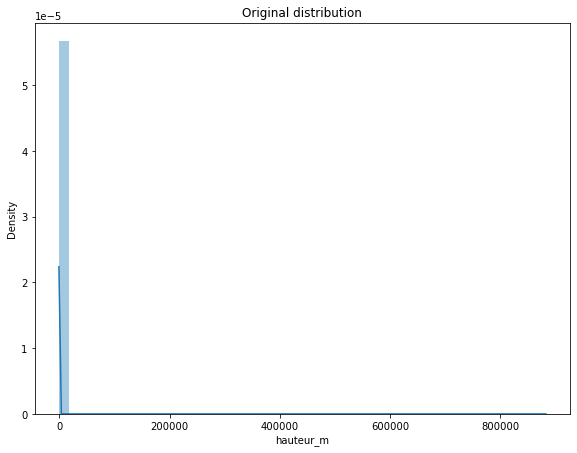

C:\Users\Vincent\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


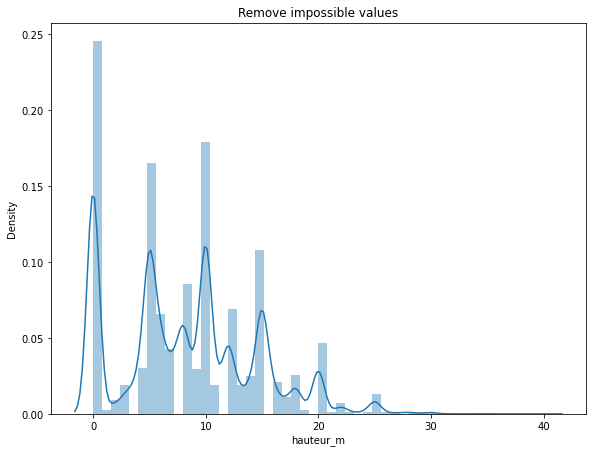

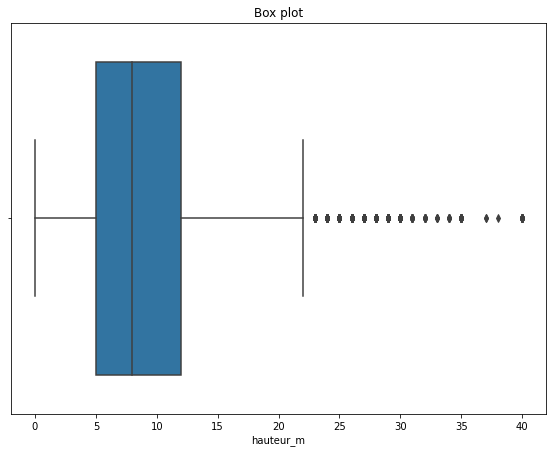

max value in dataset= 40.0
mean = 8.33
Q1 = 6.0    median = 8.0    Q3 = 10.0









 -------------------- 
 circonference_cm 
 --------------------


C:\Users\Vincent\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


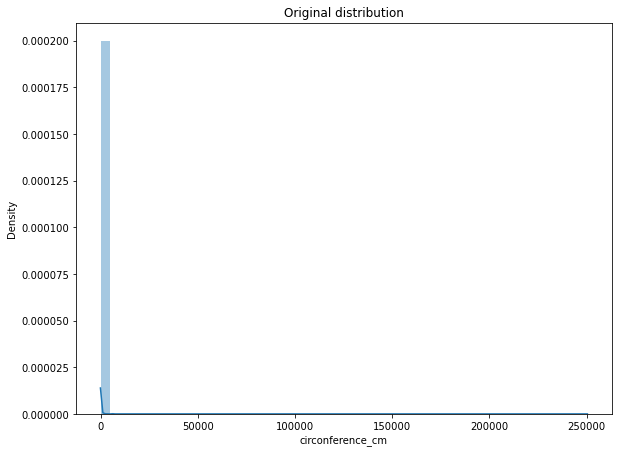

C:\Users\Vincent\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


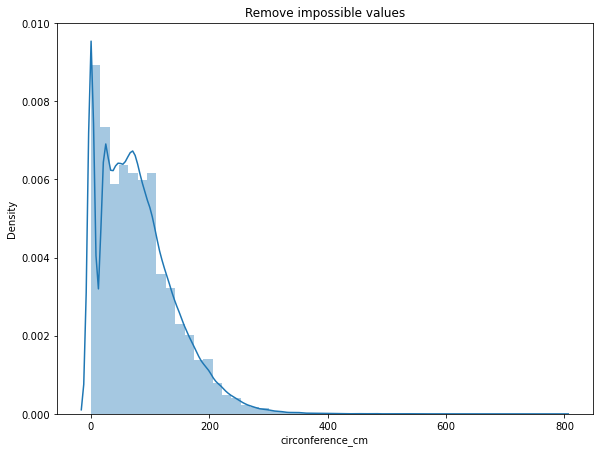

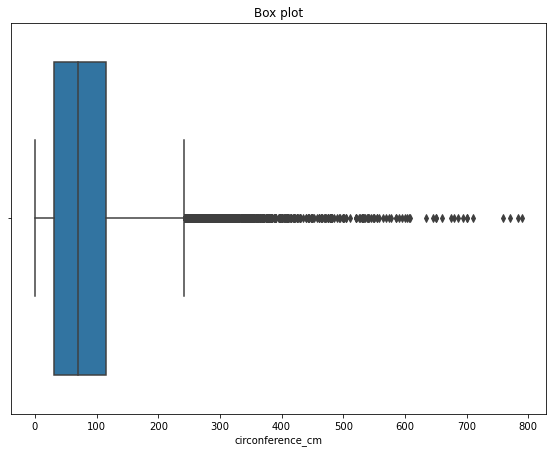

max value in dataset= 790.0
mean = 79.64
Q1 = 65.0    median = 70.0    Q3 = 75.0








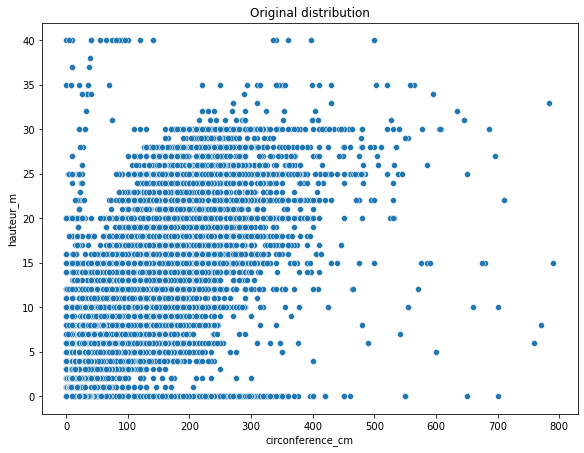

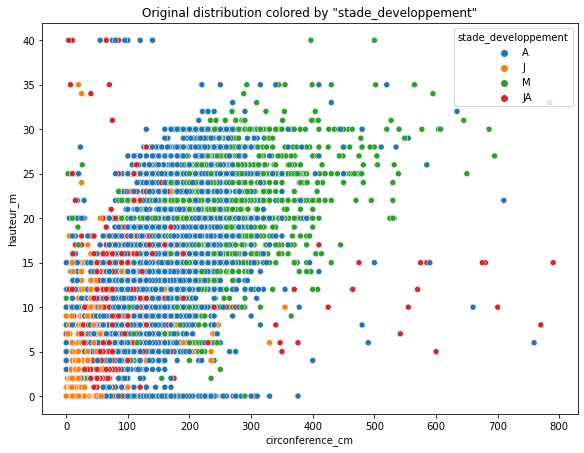

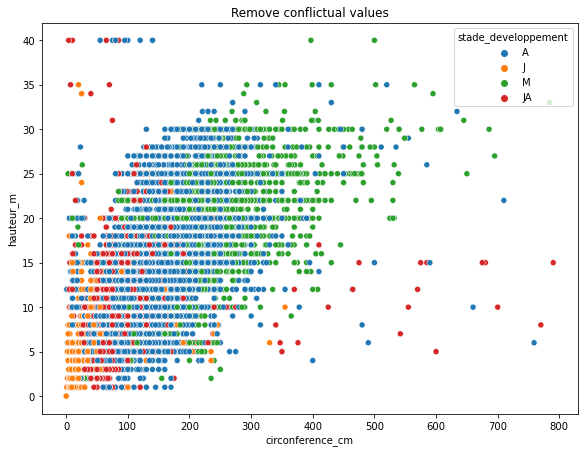

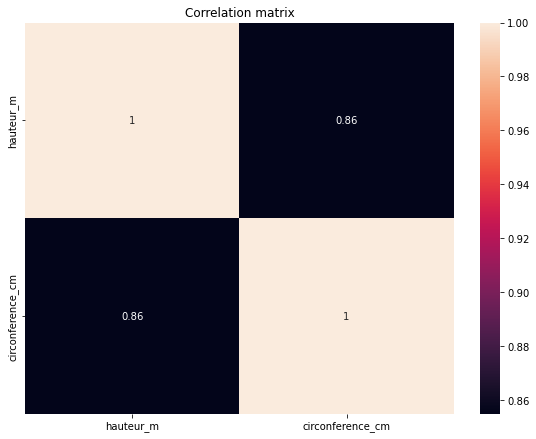

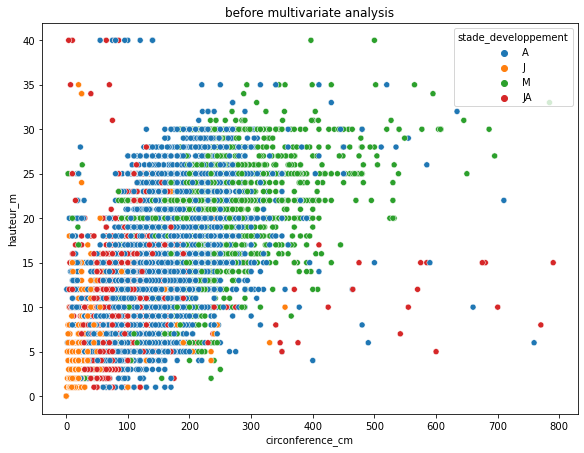

NaN hauteur_m = 14201
NaN circonference_cm = 443


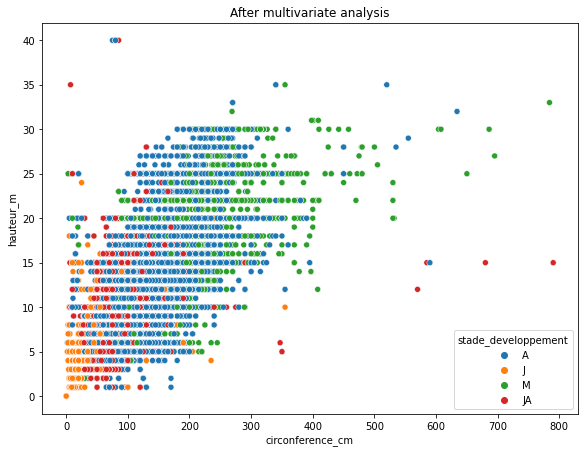

NaN hauteur_m = 15958
NaN circonference_cm = 2200









 -------------------- 
 hauteur_m 
 --------------------


C:\Users\Vincent\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


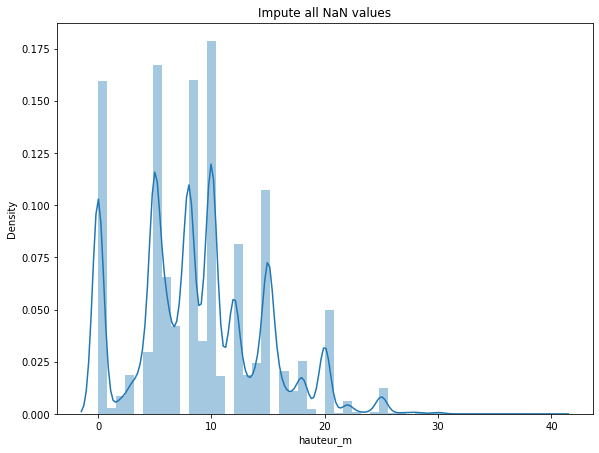

median A = 12.0
median J = 5.0
median M = 20.0
median JA = 9.0





 -------------------- 
 circonference_cm 
 --------------------


C:\Users\Vincent\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


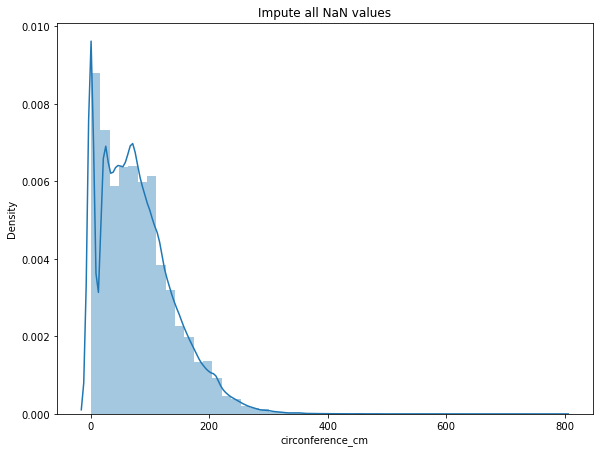

median A = 115.0
median J = 35.0
median M = 210.0
median JA = 65.0




In [23]:
clean_data = pf.clean_quantitative_column(columns, 
                                          data, 
                                          show_process=True, 
                                          show_result=False)

### Colonnes 'geo_point_2d_a' et 'geo_point_2d_b':

Doublons dans 'geo_point_2d_a': 30
Doublons dans 'geo_point_2d_b': 23


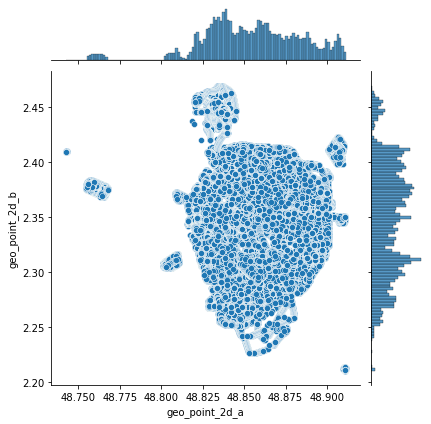

In [24]:
columns = ['geo_point_2d_a', 'geo_point_2d_b']
for column in columns:
    print(f'Doublons dans \'{column}\':', data[column].duplicated().sum())

sns.jointplot(x='geo_point_2d_a', y='geo_point_2d_b', data=data)

#### Heatmap en vue GPS

La résolution peut être changée:<br>
- pour calculs rapide: 100 ou moins<br>
- pour image détaillée: 500 ou plus

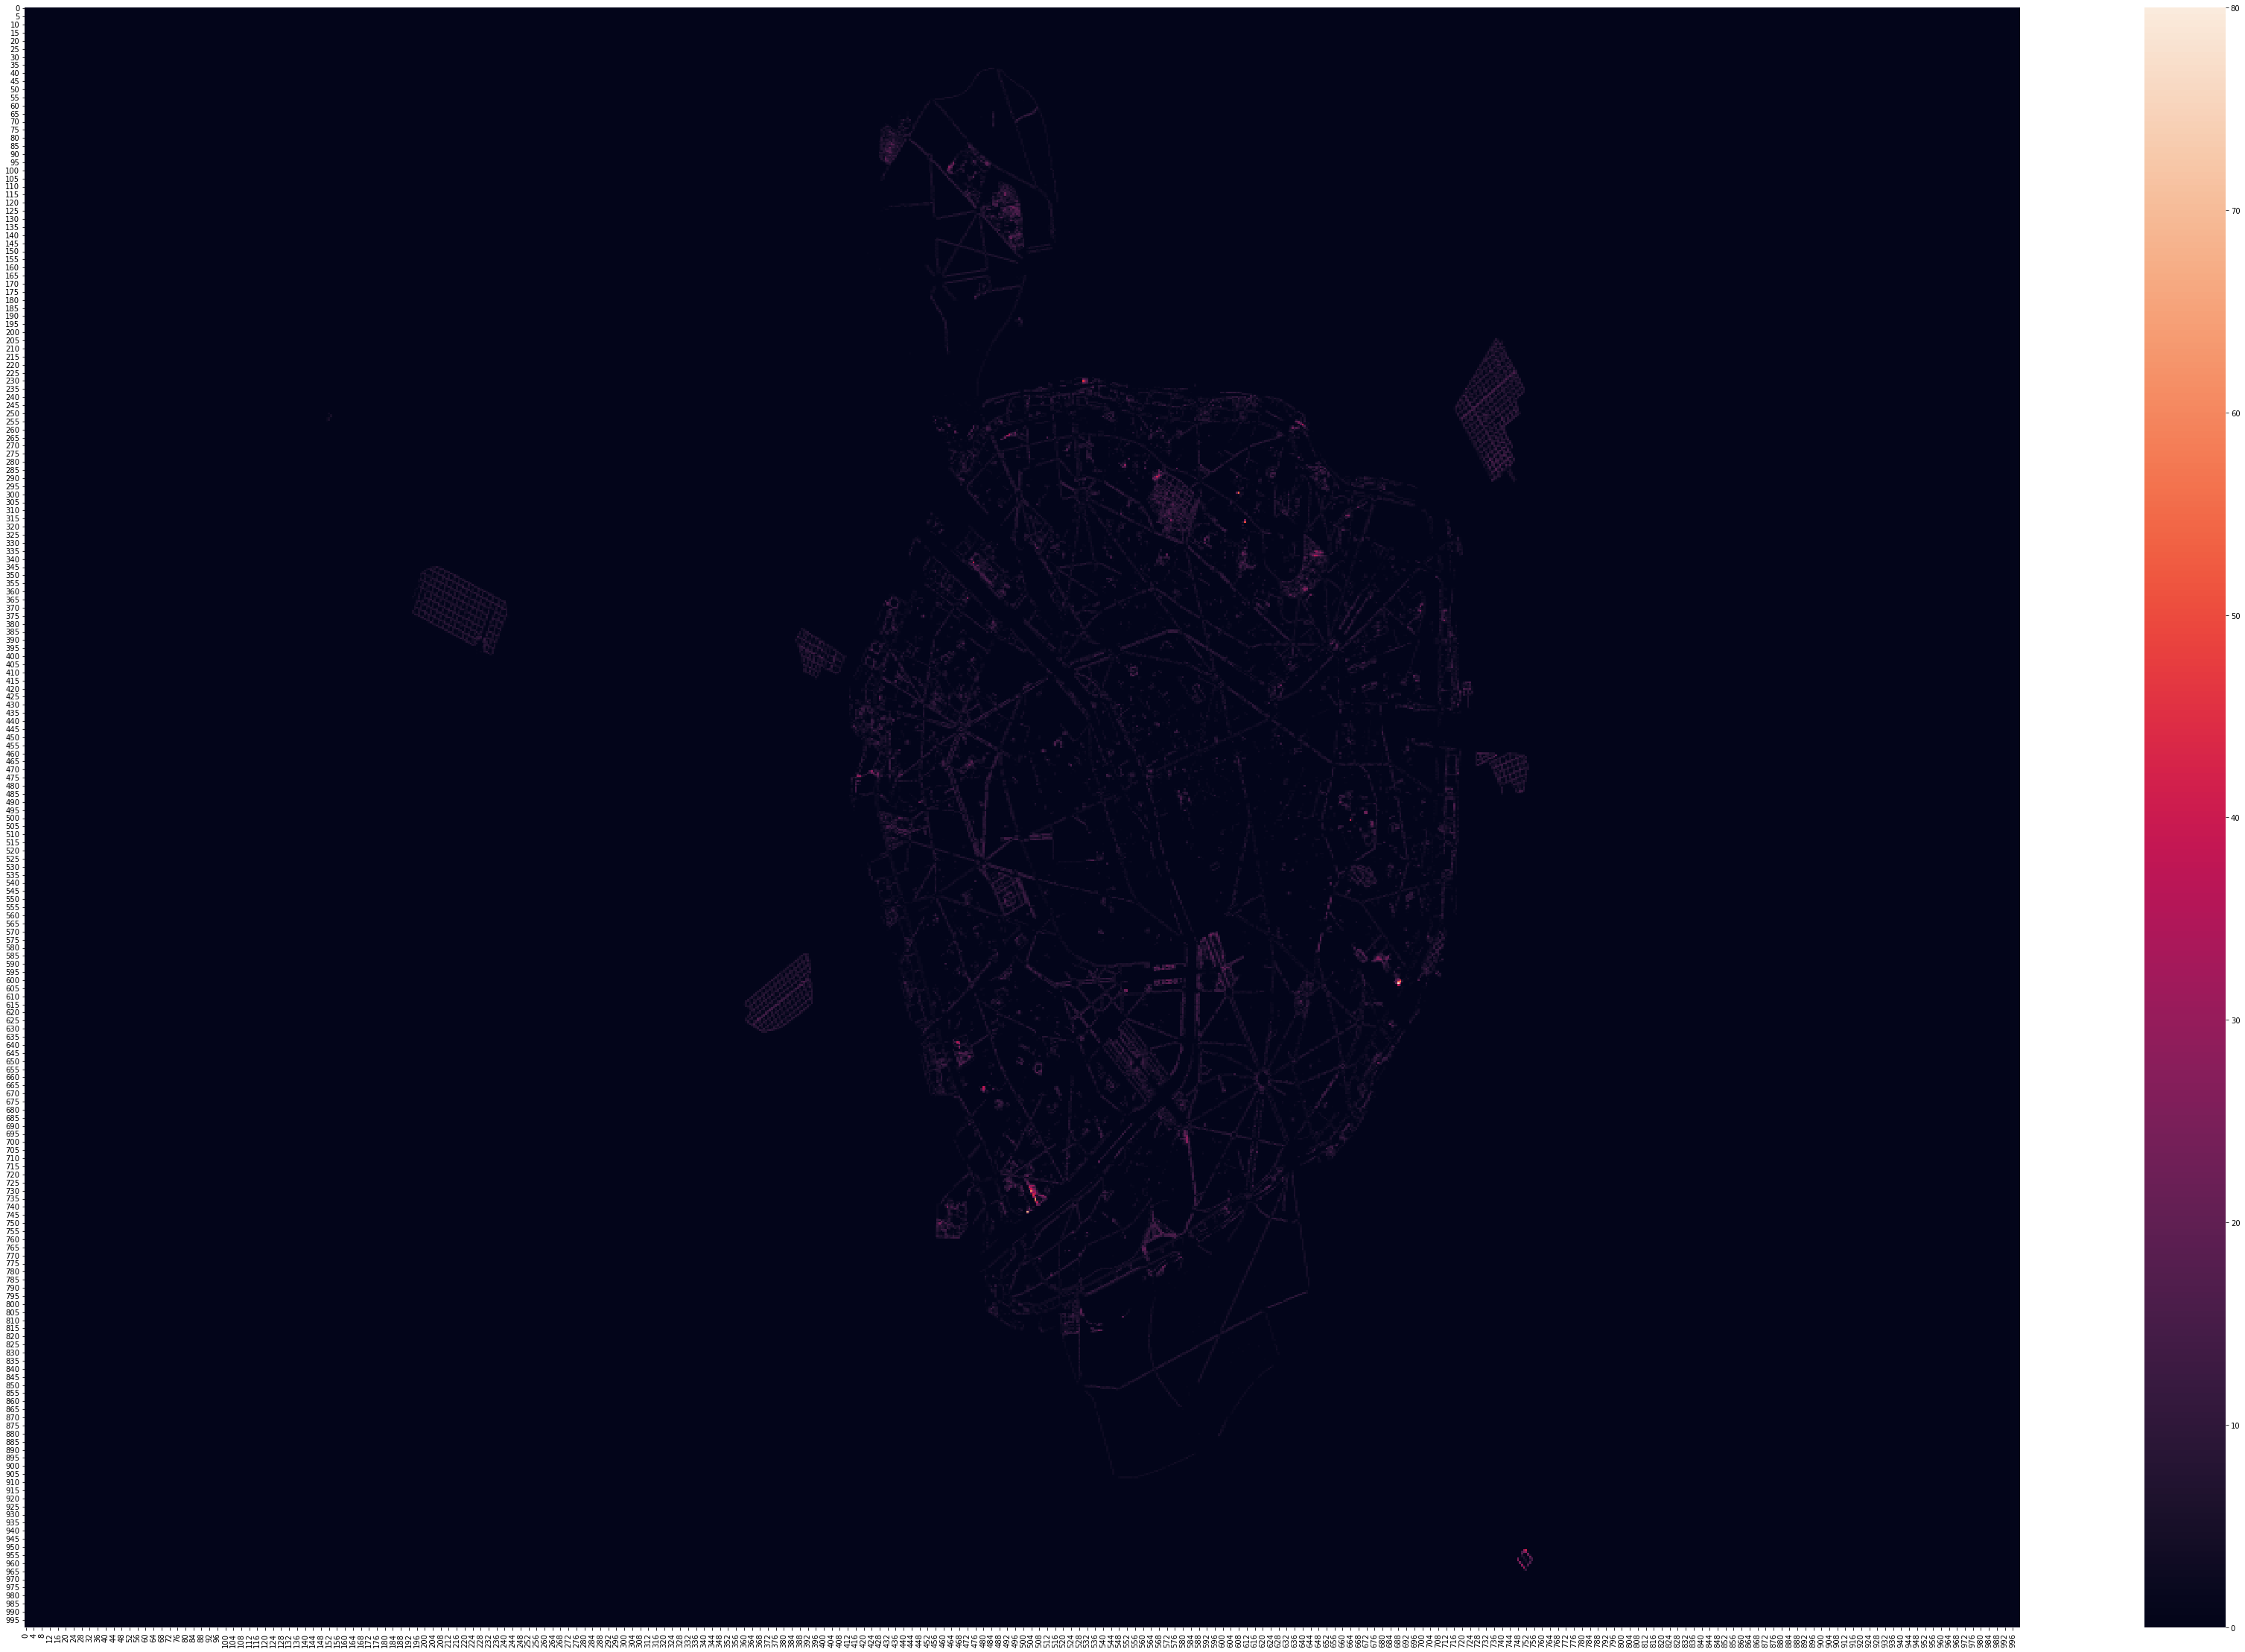

In [25]:
resolution = 1000
pf.heatmap(data['geo_point_2d_a'], data['geo_point_2d_b'], n=resolution)

Tous les points sont dans Paris ou aux alentours, pas de valeurs aberrantes.

# Syntèse

#### Les colonnes 'type_emplacement' et 'numero' pourrait être supprimées:

In [26]:
print(data['type_emplacement'].unique())
print(data['numero'].unique())

['Arbre']
[nan]


#### Résultat du nettoyage de 'hauteur_m' et 'circonference_cm':

In [27]:
columns = {'hauteur_m': 40, 'circonference_cm': 800}
'''
clean_data = pf.clean_quantitative_column(columns, 
                                          data, 
                                          show_process=False, 
                                          show_result=True)
'''

'\nclean_data = pf.clean_quantitative_column(columns, \n                                          data, \n                                          show_process=False, \n                                          show_result=True)\n'

In [28]:
clean_data.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20.0,5.0,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65.0,8.0,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90.0,10.0,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60.0,8.0,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38.0,8.0,NaN,NaN,48.890435,2.315289


In [29]:
clean_data.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,79.167036,8.857428,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,61.321111,5.680114,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,790.000000,40.000000,1.000000,48.911485,2.469759


In [30]:
clean_data[['hauteur_m', 'circonference_cm']].describe()

,hauteur_m,circonference_cm
count,200137.000000,200137.000000
mean,8.857428,79.167036
std,5.680114,61.321111
min,0.000000,0.000000
25%,5.000000,30.000000
50%,8.000000,70.000000
75%,12.000000,115.000000
max,40.000000,790.000000
